In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequality-red-csv/winequality-red.csv


In [2]:
df = pd.read_csv("/kaggle/input/winequality-red-csv/winequality-red.csv",sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.corrwith(df.quality)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_N = scaler.transform(x_train)


In [8]:
x_test_N = scaler.transform(x_test)

In [9]:
X_n = scaler.fit_transform(X)

<Axes: >

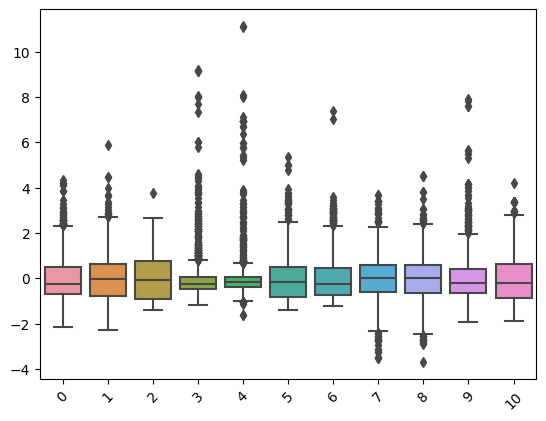

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation =45)
sns.boxplot(X_n)


In [24]:
#removing outlier
#step1 calculate upper value and lower value
upper_value = {}
lower_value ={}
for i in df.columns:
    upper_value[i]=df[i].mean()+3*df[i].std()
    lower_value[i]=df[i].mean()-3*df[i].std()

In [25]:
upper_value

{'fixed acidity': 13.542926227678894,
 'volatile acidity': 1.064999625281119,
 'citric acid': 0.8553790219720533,
 'residual sugar': 6.7685896819614895,
 'chlorides': 0.2286624476187631,
 'free sulfur dioxide': 47.25539273557052,
 'total sulfur dioxide': 145.15376580512861,
 'density': 1.0024086810360118,
 'pH': 3.77427259045797,
 'sulphates': 1.1666697817972216,
 'alcohol': 13.619985859988713,
 'quality': 8.058730833275408}

In [29]:
#trimming
for i in df.columns:
    new_df = df[(df[i]<upper_value[i]) & (df[i]>lower_value[i])]

In [36]:
new_df = new_df.drop(axis=1,columns='quality')

In [48]:
new_df_scaled = scaler.fit_transform(new_df)

In [50]:
cols=df.columns.remove()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
new_df_scaled = pd.DataFrame(new_df_scaled,columns= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [52]:
new_df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528101,0.993603,-1.398034,-0.452639,-0.240036,-0.469131,-0.382861,0.560947,1.292605,-0.582002,-0.962178
1,-0.298338,2.018969,-1.398034,0.043831,0.229532,0.869714,0.619590,0.030669,-0.716623,0.125574,-0.587034
2,-0.298338,1.335391,-1.192142,-0.168942,0.101468,-0.086604,0.224685,0.136724,-0.327740,-0.051320,-0.587034
3,1.654649,-1.398917,1.484460,-0.452639,-0.261380,0.104659,0.406949,0.667003,-0.975878,-0.464073,-0.587034
4,-0.528101,0.993603,-1.398034,-0.452639,-0.240036,-0.469131,-0.382861,0.560947,1.292605,-0.582002,-0.962178


<Axes: >

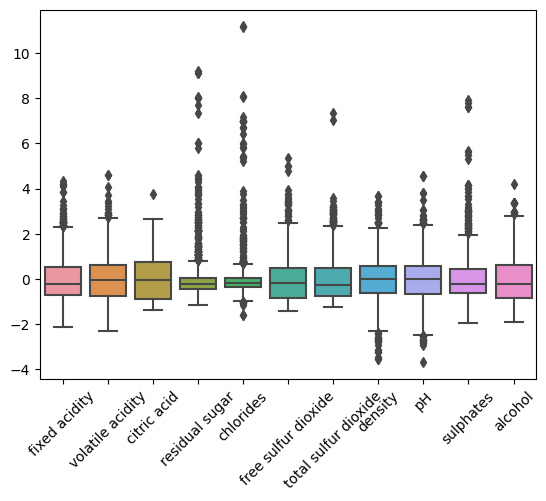

In [53]:
plt.xticks(rotation=45)
sns.boxplot(new_df_scaled)

In [77]:
upper_val1  = new_df_scaled['alcohol'].mean()+3*new_df_scaled['alcohol']

lower_val2 = new_df_scaled['alcohol'].mean() - 3*new_df_scaled['alcohol']

In [78]:
new_df_scaled[['alcohol']]

,alcohol
0,-0.962178
1,-0.587034
2,-0.587034
3,-0.587034
4,-0.962178
...,...
1584,0.069469
1585,0.725971
1586,0.538399
1587,-0.211889


In [80]:
new_scaled = new_df_scaled[(new_df_scaled['alcohol']>lower_val2) & (new_df_scaled['alcohol']<upper_val1)]

<Axes: >

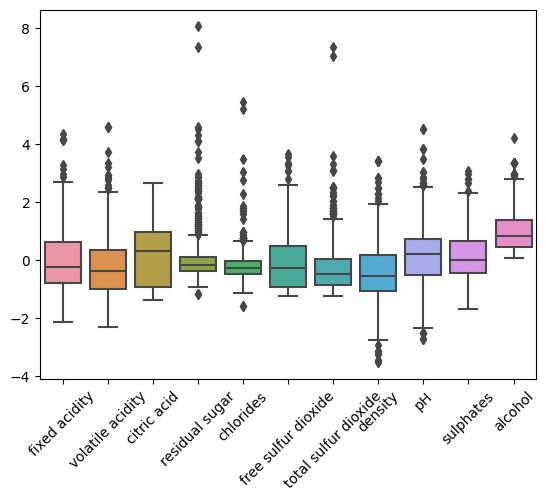

In [81]:
plt.xticks(rotation=45)
sns.boxplot(new_scaled)

In [66]:
len(df.columns)

12

In [73]:
df.columns[0]

'fixed acidity'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

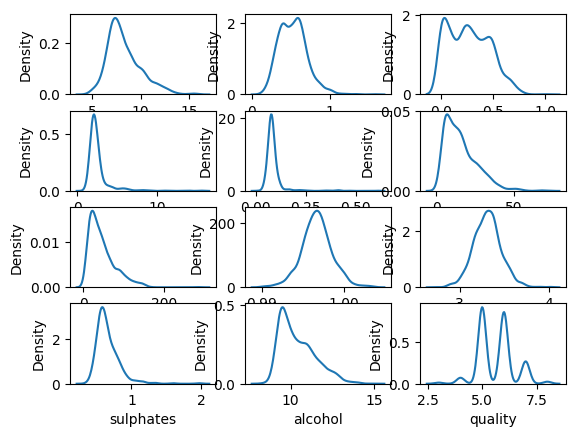

In [74]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    sns.kdeplot(df[df.columns[i]])